In [403]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
# Tensorflow untils packages.


In [404]:
df=pd.read_csv(r"C:\Users\v.tsouvalakis\Desktop\kc_house_data.csv\kc_house_data.csv")

In [405]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 1. Exploratory Data analysis

In [406]:
df.isnull().sum()
##Here we see that there is no missing data in this dataset

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [407]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


C:\Users\v.tsouvalakis\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

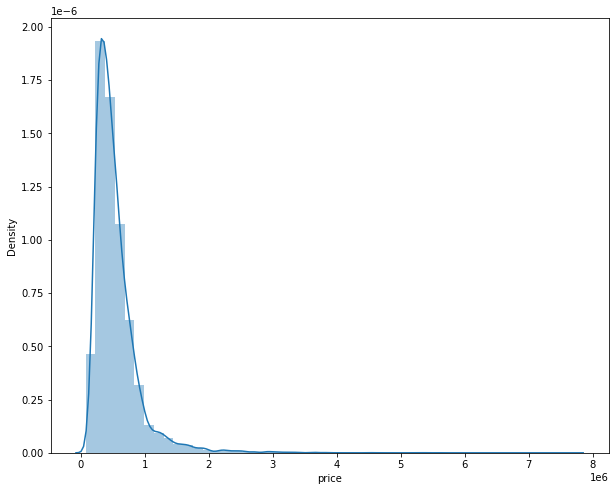

In [408]:
plt.figure(figsize=(10,8))
sns.distplot(df['price'])

In the distribution plot above, we see that the house prices are mainy distributed between 0 and 1 million dolar, and there some extreme outliers that we can just skip in order to prevent their influence over our deep learning model

C:\Users\v.tsouvalakis\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

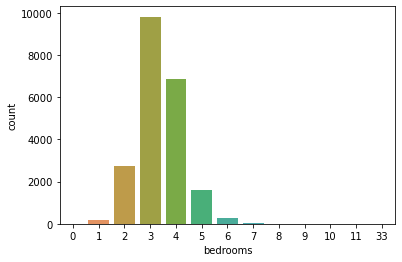

In [409]:
 
sns.countplot(df["bedrooms"])
##number of bedrooms

C:\Users\v.tsouvalakis\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='floors', ylabel='count'>

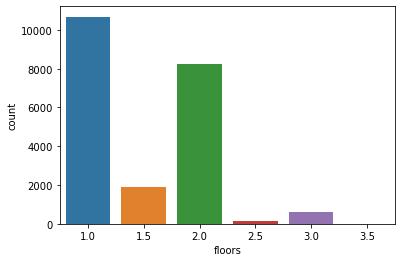

In [410]:
sns.countplot(df["floors"])


<AxesSubplot:>

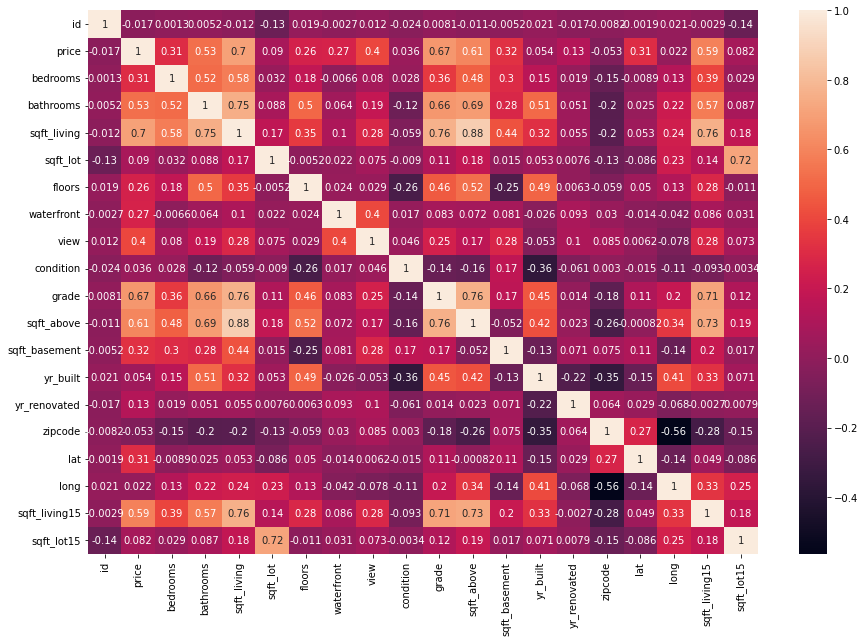

In [411]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
##Our target is house prices, we can also special correlation of prices with the other features

In [412]:
df.corr()['price'].sort_values(ascending=False)
#Here we can clearly see that there is positive 
#high correlation between house prices and sqft_living(Square footage of the apartments interior living space)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

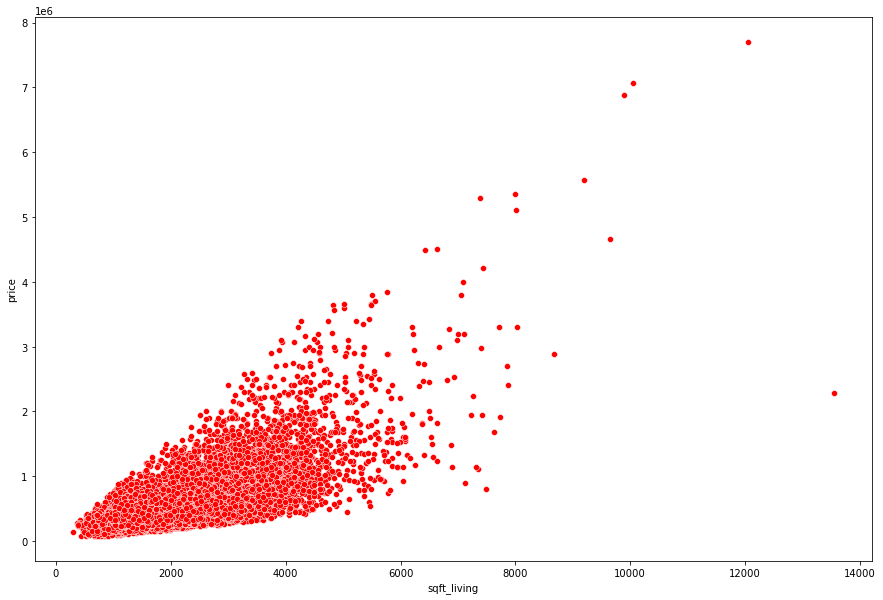

In [413]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="sqft_living", y="price", data=df,color="red")
#Here we visualize the relation between house prices and the square of the living area

<AxesSubplot:xlabel='long', ylabel='price'>

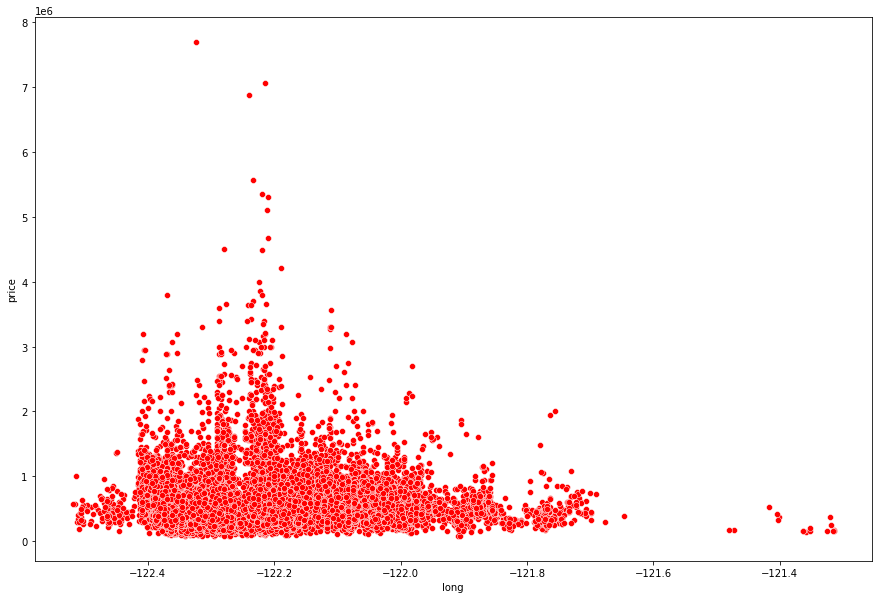

In [414]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='long',y='price',data=df,color='red')

From this plot above, we can see that the longitude between -122.0 and -122.4 has the most expensive prices, and the lontitude -121.4 has the lowest house prices

<AxesSubplot:xlabel='lat', ylabel='price'>

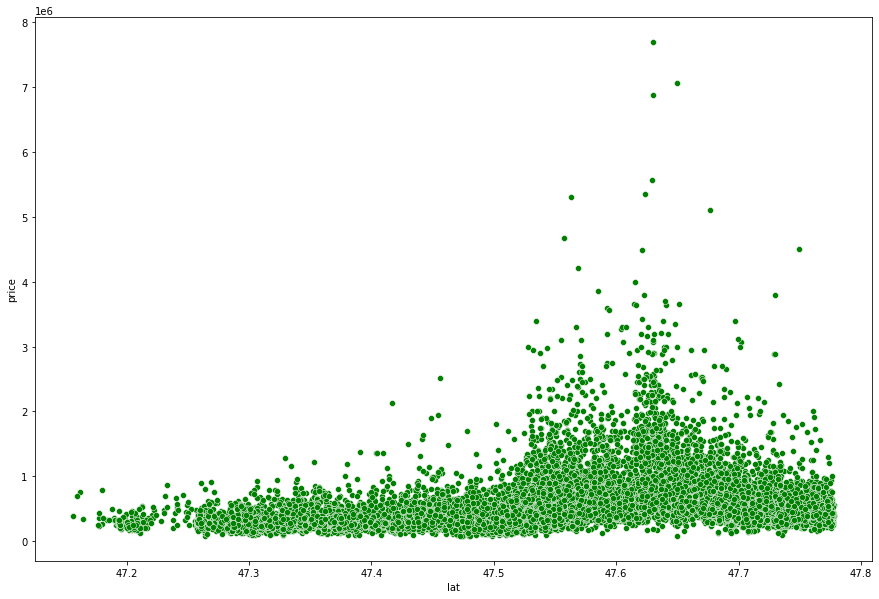

In [415]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="lat",y="price", data=df, color="green")

From this plot above, we understand that the latitude between 47.5 and 47.7 has the most expensive house prices, and the latitudes between 47.2 and 47.4 has the lowest house prices

<AxesSubplot:xlabel='long', ylabel='lat'>

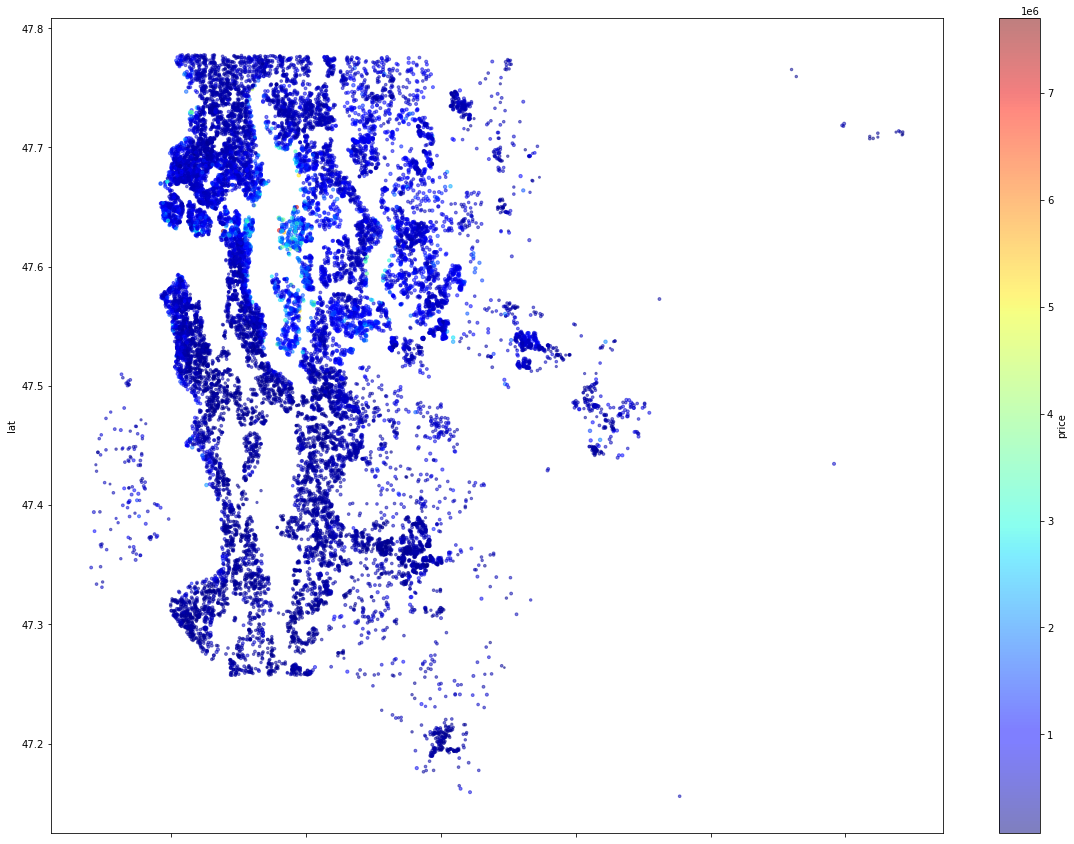

In [416]:
df.plot(x="long",y="lat",c="price", kind="scatter",alpha=0.5,figsize=(20,15), cmap=plt.get_cmap("jet"), colorbar=True, s=df["grade"])
#here we visualize the longitude and latitude and get the actual ara of the county and their relation with the price
#We can easily see that the prices between 47.7 and 47.5 latitude has the highes prices

<AxesSubplot:xlabel='long', ylabel='lat'>

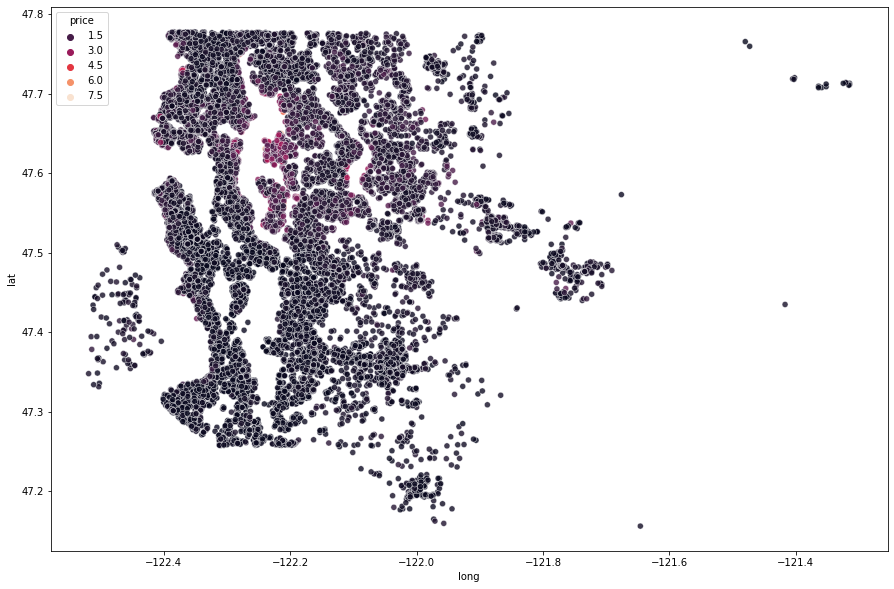

In [417]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="long",y="lat",data=df, hue="price",palette="rocket",alpha=0.8)

In [418]:
#In order to get better distribution, we can drop some outliers
df.describe()['price']

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [419]:
df[df["price"]>3000000]
#Here we can see that there are only 40 houses that have higher than 3 million dolar house price

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
300,3225069065,20140624T000000,3075000.0,4,5.00,4550,18641,1.0,1,4,...,10,2600,1950,2002,0,98074,47.6053,-122.077,4550,19508
656,3760500116,20141120T000000,3070000.0,3,2.50,3930,55867,1.0,1,4,...,8,2330,1600,1957,0,98034,47.7022,-122.224,2730,26324
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
2085,8106100105,20141114T000000,3850000.0,4,4.25,5770,21300,2.0,1,4,...,11,5770,0,1980,0,98040,47.5850,-122.222,4620,22748
2444,7524900003,20141210T000000,3278000.0,2,1.75,6840,10000,2.5,1,4,...,11,4350,2490,2001,0,98008,47.6042,-122.112,3120,12300
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
2864,4114601570,20141118T000000,3600000.0,3,3.25,5020,12431,2.0,1,4,...,10,3420,1600,1941,2002,98144,47.5925,-122.287,3680,12620
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449


# Therefore, I will just create a new data frame without these outliers and create geographical maps again

In [420]:
df_without_outliers=df.sort_values("price",ascending=False).iloc[46:]
df_without_outliers.sort_values("price",ascending=False).head()
#Now we have created a new data frame that has house prices lower than 3 million dolars

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11257,3761100045,20140618T000000,3000000.0,4,4.25,4850,12445,2.0,1,4,...,10,3850,1000,1989,0,98034,47.7011,-122.244,3350,12210
2899,9808100100,20150202T000000,3000000.0,5,3.25,5370,14091,2.0,0,0,...,10,3850,1520,1918,2008,98004,47.6499,-122.216,2410,12047
20325,518500480,20140811T000000,3000000.0,3,3.50,4410,10756,2.0,1,4,...,11,3430,980,2014,0,98056,47.5283,-122.205,3550,5634
21530,8964800330,20150407T000000,3000000.0,4,3.75,5090,14823,1.0,0,0,...,11,4180,910,2013,0,98004,47.6200,-122.207,3030,12752
20441,1925059254,20150507T000000,2998000.0,5,4.00,6670,16481,2.0,0,0,...,12,4960,1710,2007,0,98004,47.6409,-122.221,4800,16607


<AxesSubplot:xlabel='long', ylabel='lat'>

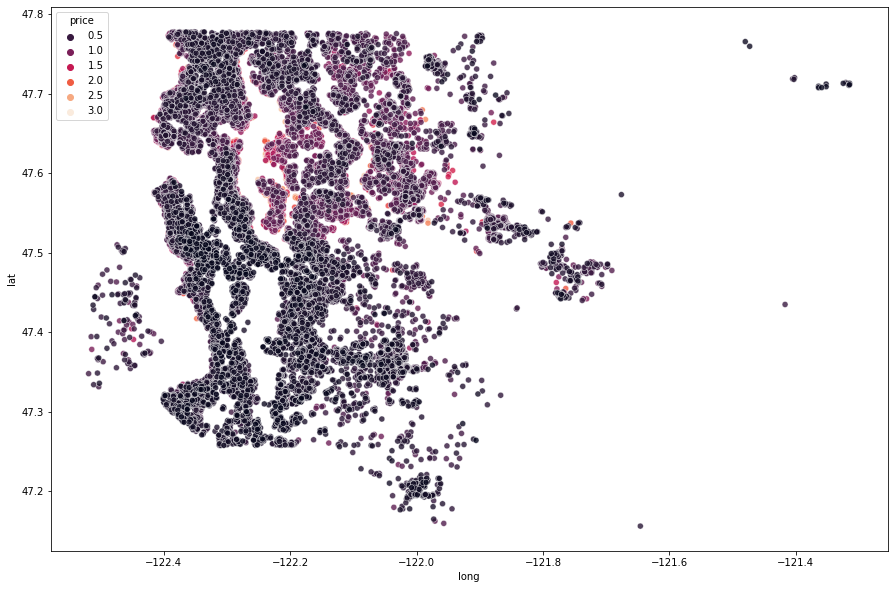

In [421]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="long",y="lat",data=df_without_outliers, hue="price",palette="rocket",alpha=0.8)

<AxesSubplot:xlabel='long', ylabel='lat'>

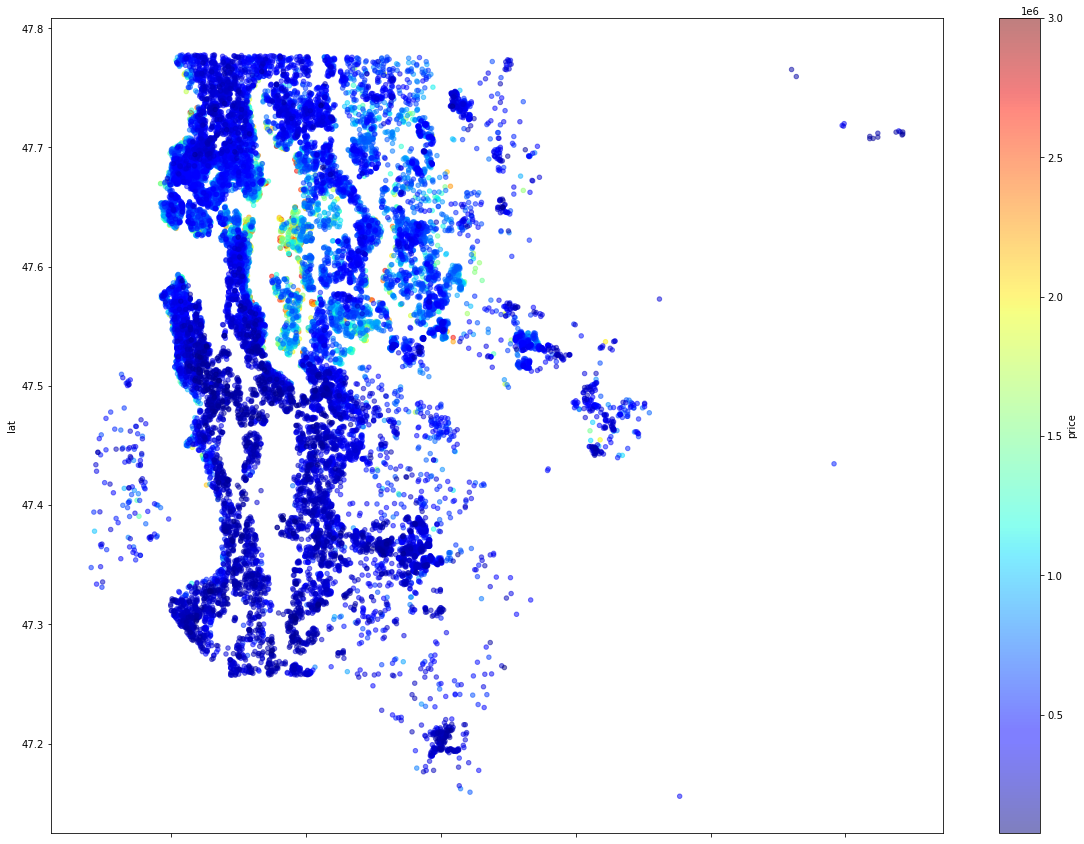

In [422]:
df_without_outliers.plot(x="long",y="lat",c="price", kind="scatter",alpha=0.5,figsize=(20,15), cmap=plt.get_cmap("jet"), colorbar=True)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

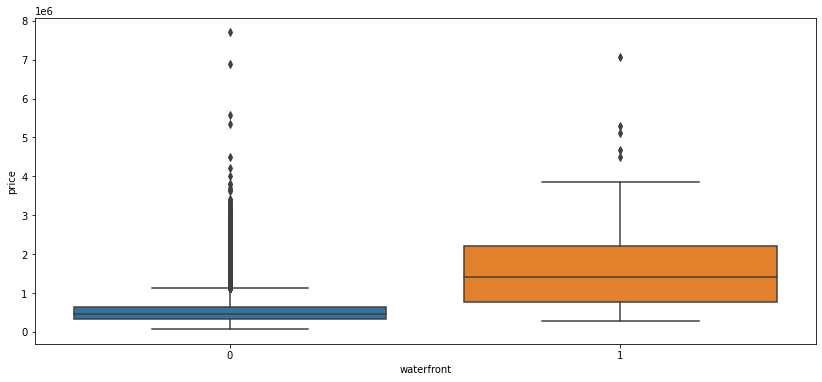

In [423]:
plt.figure(figsize=(14,6))
sns.boxplot(x='waterfront',y='price',data=df)

In [424]:
#The boxplot above shows that the houses near waterfront have higher house prices

# 2. Feature Engineering

In [425]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [426]:
##Drop the id column beacuse we dont need it
df.drop('id',axis=1,inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [428]:
##change the date column to correct data type
df['date']=pd.to_datetime(df['date'])
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [429]:
##Extract year and month in new columns 
df['year'] = df['date'].apply(lambda x:x.year)
df['month']=df['date'].apply(lambda x : x.month)

In [430]:
df[['year','month']].head()

,year,month
0,2014,10
1,2014,12
2,2015,2
3,2014,12
4,2015,2


In [431]:
df.groupby('year').mean()['price']

year
2014    539181.428415
2015    541988.992264
Name: price, dtype: float64

In [432]:
##Drop the date column
df.drop('date',axis=1,inplace=True)

In [433]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [434]:
df["zipcode"].value_counts()
# we need to drop zipcode column because ml algorithm will treat this as continues value and then cause wrong predcitions
# We can not make them dummy variables because there 70 ifferent zip codes

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [435]:
df.drop("zipcode", axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [436]:
##Here we create a function to assign to 1 for those that are renovated and 0
#to those that are not
df['renovated']=df['yr_renovated'].apply(lambda x : 1 if x>0 else 0 )

C:\Users\v.tsouvalakis\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='renovated', ylabel='count'>

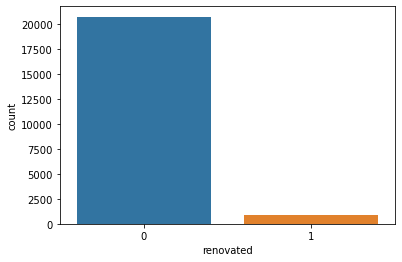

In [437]:
sns.countplot(df['renovated'])

# 3. Splitting the Data and Train the Algorithm:

In [440]:
#Here we assign features  to the X and price to the y 
x=df.drop("price",axis=1)
y=df["price"]

In [441]:
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,renovated
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12,1
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,2014,5,0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2015,2,0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,2014,6,0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,2015,1,0


In [442]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [443]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [444]:
print("x_train shape is ",x_train.shape)
print("y_train shape is ",y_train.shape)
print("x_test shape is ",x_test.shape)
print("y_test shape is ",y_test.shape)

x_train shape is  (15129, 20)
y_train shape is  (15129,)
x_test shape is  (6484, 20)
y_test shape is  (6484,)


In [445]:
from sklearn.preprocessing import StandardScaler

In [446]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Lets build our first base model

In [447]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [574]:
model=Sequential() #here we get an insance of our model
model.add(Dense(50, activation="relu")) # here we add a dense layer with 20 neurons because we have 20 features

model.add(Dense(30, activation="relu")) # here we add a dense layer with 20 neurons because we have 20 features

model.add(Dense(20, activation="relu")) # here we add a dense layer with 20 neurons because we have 20 features

model.add(Dense(10, activation="relu")) # here we add a dense layer with 20 neurons because we have 20 features

model.add(Dense(1)) # here we add a dthe fina layer with 1 neurons because we have one output, that is the house price



In [575]:
model.compile(optimizer='adam',loss='mse',metrics=['mae','mse'])
#Here assign adam optimizer as our optimizer and mean squared error as our loss function for our deep learning model

In [576]:
model.fit(x_train,y_train,batch_size=128,epochs=200,validation_data=(x_test,y_test))

Epoch 1/200
119/119 [==============================] - 1s 2ms/step - loss: 431995748352.0000 - mae: 542323.2500 - mse: 431995748352.0000 - val_loss: 413048897536.0000 - val_mae: 534495.0625 - val_mse: 413048897536.0000
Epoch 2/200
119/119 [==============================] - 0s 1ms/step - loss: 426751098880.0000 - mae: 538933.1875 - mse: 426751098880.0000 - val_loss: 395316953088.0000 - val_mae: 522907.3750 - val_mse: 395316953088.0000
Epoch 3/200
119/119 [==============================] - 0s 1ms/step - loss: 361198616576.0000 - mae: 495068.0312 - mse: 361198616576.0000 - val_loss: 262828490752.0000 - val_mae: 425165.9375 - val_mse: 262828490752.0000
Epoch 4/200
119/119 [==============================] - 0s 1ms/step - loss: 168352464896.0000 - mae: 325097.1562 - mse: 168352464896.0000 - val_loss: 94525349888.0000 - val_mae: 234755.8281 - val_mse: 94525349888.0000
Epoch 5/200
119/119 [==============================] - 0s 1ms/step - loss: 78785363968.0000 - mae: 209951.7812 - mse: 78785363

In [578]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [579]:
predictions_test_model1=model.predict(x_test)
predictions_train_model1=model.predict(x_train)

473/473 [==============================] - 0s 610us/step


In [580]:
##Metrics results using our model in Test Dataset

print("The absolute mean error :",mean_absolute_error(y_test, predictions_test_model1))
print("The squared mean error :",mean_squared_error(y_test, predictions_test_model1))
print("The squared mean error :",np.sqrt(mean_squared_error(y_test, predictions_test_model1)))

The absolute mean error : 101089.96859577422
The squared mean error : 27412616413.877457
The squared mean error : 165567.5584584053


In [581]:
print("The mean of the real data: ",df["price"].mean())
print("The absolute mean error :",mean_absolute_error(y_test, predictions_test_model1))

The mean of the real data:  540088.1417665294
The absolute mean error : 101089.96859577422


There is 101084.46  dolar error 

In [582]:
print("Variance Score in training set",explained_variance_score(y_train,predictions_train_model1))
print("Variance Score in Test set ",explained_variance_score(y_test,predictions_test_model1))

Variance Score in training set 0.8152541381541094
Variance Score in Test set  0.7854734691912364


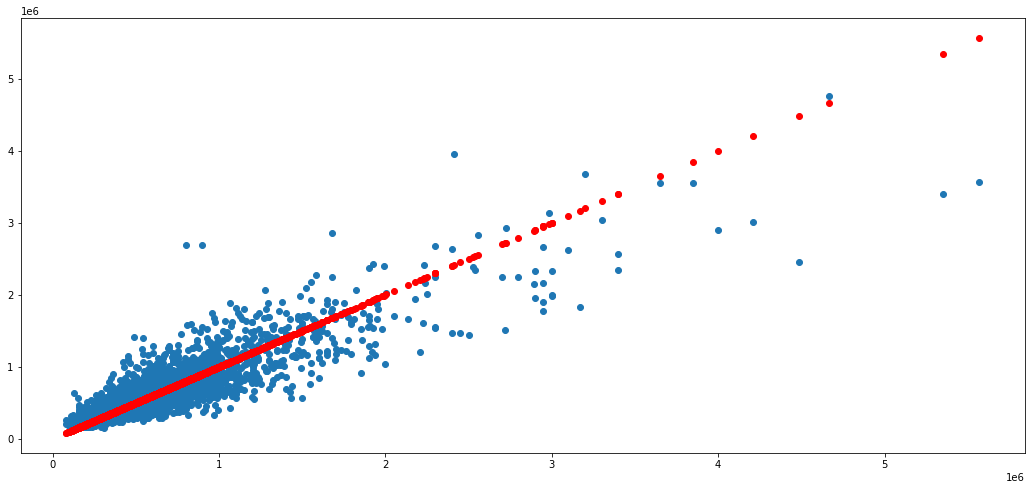

In [583]:
plt.figure(figsize=(18,8))
plt.scatter(y_test, predictions_test_model1)
plt.scatter(y_test,y_test,color="red")
#In this we can see that our model predict lower and normal house prices very good, but the oulier not good
#The outlier affects negatively the performance of our model